In [931]:
from kats.models.prophet import ProphetModel, ProphetParams
from kats.consts import TimeSeriesData
from kats.models.var import VARModel, VARParams

In [932]:
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
import numpy as np
import matplotlib.pyplot as plt

In [933]:
patient1_RRI=pd.read_table("/Users/erikafox/Desktop/Heart-Rate-Variability-Repo/1st topic/3578243.ECG2177606AnesEvents-6+10mins_RRI.txt",sep=",",names=["time","signal"])
patient1_BIS=pd.read_table("/Users/erikafox/Desktop/Heart-Rate-Variability-Repo/1st topic/3578243.ECG2177606AnesEvents-6+10mins_BIS.txt",sep=",",names=["time","signal"])
patient1=pd.DataFrame( { 'time': patient1_RRI["time"], 'RRI': patient1_RRI["signal"],'BIS':patient1_BIS["signal"] } )


patient2_RRI=pd.read_table("/Users/erikafox/Desktop/Heart-Rate-Variability-Repo/1st topic/7195417.ECG3710114AnesEvents-6+10mins_RRI.txt",sep=",",names=["time","signal"])
patient2_BIS=pd.read_table("/Users/erikafox/Desktop/Heart-Rate-Variability-Repo/1st topic/7195417.ECG3710114AnesEvents-6+10mins_BIS.txt",sep=",",names=["time","signal"])
patient2=pd.DataFrame( { 'time': patient2_RRI["time"], 'RRI': patient2_RRI["signal"],'BIS':patient2_BIS["signal"] } )

patient3_RRI=pd.read_table("/Users/erikafox/Desktop/Heart-Rate-Variability-Repo/1st topic/06233283.ECG2442913AnesEvents-6+10mins_RRI.txt",sep=",",names=["time","signal"])
patient3_BIS=pd.read_table("/Users/erikafox/Desktop/Heart-Rate-Variability-Repo/1st topic/06233283.ECG2442913AnesEvents-6+10mins_BIS.txt",sep=",",names=["time","signal"])
patient3=pd.DataFrame( { 'time': patient3_RRI["time"], 'RRI': patient3_RRI["signal"],'BIS':patient3_BIS["signal"] } )



In [934]:
patient1["pre_during"]=np.where(patient1['time']<patient1['time'][1440],0,1)
patient1=patient1.drop(columns=["time"])

patient2["pre_during"]=np.where(patient2['time']<patient2['time'][1440],0,1)
patient2=patient2.drop(columns=["time"])

patient3["pre_during"]=np.where(patient3['time']<patient3['time'][1440],0,1)
patient3=patient3.drop(columns=["time"])

In [935]:
patient1['patient']='patient 1'
patient2['patient']='patient 2'
patient3['patient']='patient 3'



patient1['time']=patient1.index
patient2['time']=patient2.index
patient3['time']=patient3.index


df=pd.concat([patient1, patient2])
df=pd.concat([df, patient3])

df=df.dropna()


In [936]:
df

,RRI,BIS,pre_during,patient,time
0,947.496594,38.933975,0,patient 1,0
1,946.049856,38.744022,0,patient 1,1
2,950.959205,38.554069,0,patient 1,2
3,959.596392,38.364116,0,patient 1,3
4,969.281723,38.174163,0,patient 1,4
...,...,...,...,...,...
3836,1140.766647,28.717459,1,patient 3,3836
3837,1141.498737,28.712461,1,patient 3,3837
3838,1142.230828,28.707464,1,patient 3,3838
3839,1142.962918,28.702466,1,patient 3,3839


In [937]:
df2=df.groupby("time")['RRI'].apply(list)
x=pd.DataFrame(df2).reset_index()
x

,time,RRI
0,0,"[947.496593696054, 1055.7129619471, 982.034640..."
1,1,"[946.049855706645, 1053.14586738381, 977.96632..."
2,2,"[950.959204917901, 1049.44123380795, 975.91420..."
3,3,"[959.59639237171, 1045.46782054286, 977.147376..."
4,4,"[969.281723471716, 1042.0943869119, 981.219560..."
...,...,...
3836,3836,"[671.1284312347, 852.841399882666, 1140.766647..."
3837,3837,"[669.305194745206, 853.109321369199, 1141.4987..."
3838,3838,"[667.93717787221, 853.377242855733, 1142.23082..."
3839,3839,"[667.119143658001, 853.645164342266, 1142.9629..."


In [938]:
df=pd.DataFrame(x.RRI.tolist(), index= df2.index).reset_index()

In [939]:
df=df.dropna()


In [940]:
df=df.rename(columns={0:"patient1",1:"patient2",2:"patient3"})
df["mean"]=(df["patient1"]+df["patient2"]+df["patient3"])/3

df["pre_during"]=np.where(df['time']<df['time'][1440],0,1)
df

,time,patient1,patient2,patient3,mean,pre_during
0,0,947.496594,1055.712962,982.034641,995.081399,0
1,1,946.049856,1053.145867,977.966327,992.387350,0
2,2,950.959205,1049.441234,975.914210,992.104883,0
3,3,959.596392,1045.467821,977.147376,994.070530,0
4,4,969.281723,1042.094387,981.219561,997.531890,0
...,...,...,...,...,...,...
3836,3836,671.128431,852.841400,1140.766647,888.245493,1
3837,3837,669.305195,853.109321,1141.498737,887.971085,1
3838,3838,667.937178,853.377243,1142.230828,887.848416,1
3839,3839,667.119144,853.645164,1142.962918,887.909075,1


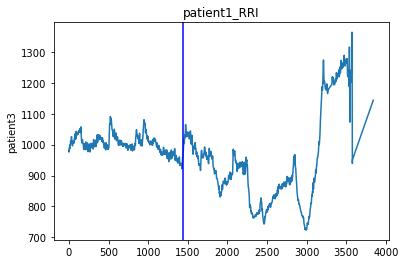

In [941]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.lineplot(x=df.index,y=df["patient3"])
plt.title("patient1_RRI")
plt.axvline(x = 1440, color = 'b', label = 'axvline - full height')

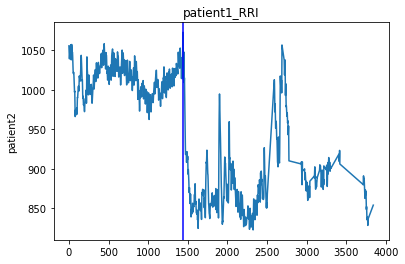

In [942]:
sns.lineplot(x=df.index,y=df["patient2"])
plt.title("patient1_RRI")
plt.axvline(x = 1440, color = 'b', label = 'axvline - full height')

In [943]:
from statsmodels.tsa.seasonal import seasonal_decompose

#patient 1
result_mul = seasonal_decompose(df["patient1"], model='multiplicative', period=30)
df["patient1"] = df["patient1"] - result_mul.trend

result_mul = seasonal_decompose(df["patient2"], model='multiplicative', period=30)
df["patient2"] = df["patient2"] - result_mul.trend

#patient 2
result_mul = seasonal_decompose(df["patient3"], model='multiplicative', period=30)
df["patient3"] = df["patient3"] - result_mul.trend

result_mul = seasonal_decompose(df["mean"], model='multiplicative', period=30)
df["mean"] = df["mean"] - result_mul.trend




In [944]:
df=df.dropna()
df=df.drop(columns=["time","mean"])
df

,patient1,patient2,patient3,pre_during
15,-17.631569,4.990563e+00,2.427861e+00,0
16,-17.484495,6.209667e+00,2.503941e-02,0
17,-16.078915,6.805756e+00,-2.707605e+00,0
18,-14.943812,6.837709e+00,-4.074041e+00,0
19,-15.628912,6.536688e+00,-2.632037e+00,0
...,...,...,...,...
3821,0.029946,-2.273737e-13,-4.774847e-12,1
3822,0.919822,3.410605e-13,-4.320100e-12,1
3823,1.496466,-1.136868e-13,-4.320100e-12,1
3824,1.049843,-2.273737e-13,-3.637979e-12,1


In [945]:
from statsmodels.tsa.arima.model import ARIMA
train = df

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

/opt/miniconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [946]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 20, Feb, 2023
Time:                     17:14:25
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   0.110224
Nobs:                     3810.00    HQIC:                 0.0890895
Log likelihood:          -21752.1    FPE:                    1.08052
AIC:                    0.0774396    Det(Omega_mle):         1.07486
--------------------------------------------------------------------
Results for equation patient1
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.006568         0.108101            0.061           0.952
L1.patient1           0.946830         0.005247          180.461           0.000
L1.patient2          -0.021090         0.007511          

In [947]:
#sim=pd.DataFrame(model_fit.simulate(len(df)))

In [948]:
sim=pd.DataFrame(model_fit.simulate_var(len(df)),columns=df.columns)
sim

,patient1,patient2,patient3,pre_during
0,0.006568,0.021908,-0.005243,0.000696
1,-0.309888,-2.133438,5.627954,0.005401
2,6.227267,-9.214858,12.709351,0.002609
3,8.258748,-4.075816,9.162484,0.008469
4,1.148511,-3.595424,6.373453,0.005062
...,...,...,...,...
3806,-3.510389,-4.112780,13.420003,0.062913
3807,-2.418964,-0.529092,9.566800,0.062225
3808,-5.453405,-0.243400,-0.214170,0.092127
3809,-11.338999,-1.649282,1.663271,0.060515


In [949]:
df["patient1"]

15     -17.631569
16     -17.484495
17     -16.078915
18     -14.943812
19     -15.628912
          ...    
3821     0.029946
3822     0.919822
3823     1.496466
3824     1.049843
3825     0.125463
Name: patient1, Length: 3811, dtype: float64

In [950]:
mean_squared_error(sim["patient1"],df["patient1"])

330.1235272285136

In [951]:
mean_squared_error(sim["patient3"],df["patient3"])

342.12438108202355

In [952]:
mean_squared_error(sim["patient2"],df["patient2"])

156.11798320564432